In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

k = 3

X, y = make_blobs(n_samples=1000, n_features=2, 
                  centers=k, random_state=42,
                  cluster_std=2)

In [2]:
def create_centroids(data_x, k):
    
    min_data_x = np.min(data_x[:, 0])
    max_data_x = np.max(data_x[:, 0])
    min_data_y = np.min(data_x[:, 1])
    max_data_y = np.max(data_x[:, 1])

    random_x_list = [np.random.uniform(min_data_x, max_data_x) for each in range(k)]

    random_y_list = [np.random.uniform(min_data_y, max_data_y) for each in range(k)]

    zipped_list = list(zip(random_x_list, random_y_list))
        
    return np.array(zipped_list)

In [3]:
centroids = create_centroids(data_x = X, k=3)

In [4]:
centroids

array([[-2.18151358, 12.1916845 ],
       [ 7.00819692, 13.34144703],
       [-8.97849126,  7.49972811]])

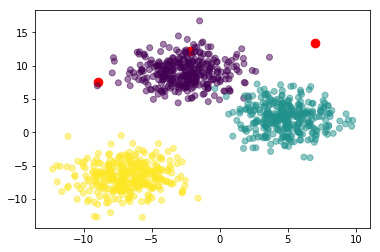

In [5]:
plt.scatter(centroids[:, 0], centroids[:, 1], 
            color='red', s=75, 
            zorder=1, alpha=1)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [6]:
#Need to calculate distance from each point in data set to each of the three centroids.

In [7]:
df_points = pd.DataFrame(X, columns=['X_Value', 'Y_Value'])

df_points['ED_1'] = (((df_points['X_Value'] - centroids[0][0])**2) + \
                    ((df_points['Y_Value'] - centroids[0][1])**2))**(0.5)

df_points['ED_2'] = (((df_points['X_Value'] - centroids[1][0])**2) + \
                    ((df_points['Y_Value'] - centroids[1][1])**2))**(0.5)

df_points['ED_3'] = (((df_points['X_Value'] - centroids[2][0])**2) + \
                    ((df_points['Y_Value'] - centroids[2][1])**2))**(0.5)

df_points['CLUSTER_ID'] = df_points[['ED_1', 'ED_2', 'ED_3']].idxmin(axis=1)

In [8]:
df_points.head()

,X_Value,Y_Value,ED_1,ED_2,ED_3,CLUSTER_ID
0,-6.313051,-7.397920,20.020544,24.649077,15.134215,ED_3
1,-5.395436,-6.281524,18.750700,23.214459,14.239424,ED_3
2,5.756533,2.125180,12.819793,11.285889,15.684600,ED_2
3,-3.427919,7.314597,5.033836,12.051367,5.553658,ED_1
4,-3.028380,6.008000,6.241405,12.430299,6.134254,ED_3


In [9]:
ed_1 = (((X[:, 0] - centroids[0][0])**2) + (X[:, 1] - centroids[0][1])**2)**(0.5)
ed_2 = (((X[:, 0] - centroids[1][0])**2) + (X[:, 1] - centroids[1][1])**2)**(0.5)
ed_3 = (((X[:, 0] - centroids[2][0])**2) + (X[:, 1] - centroids[2][1])**2)**(0.5)

In [10]:
ed_list = [ed_1, ed_2, ed_3]

In [11]:
np.array(ed_list)

array([[20.02054424, 18.75069994, 12.81979257, ...,  6.9836655 ,
        11.98276602, 20.34134438],
       [24.64907673, 23.2144595 , 11.28588937, ...,  7.44722441,
        12.27797848, 25.52204083],
       [15.13421537, 14.23942426, 15.68460048, ..., 11.72249596,
        13.73170368, 14.83033508]])

In [12]:
def calculate_distance(data_x, centroid_data, k):
    dist_list = [(((X[:, 0] - centroid_data[each][0])**2) + \
                (X[:, 1] - centroid_data[each][1])**2)**(0.5) \
               for each in range(k)]
    return np.array(dist_list)

In [25]:
calculate_distance(X, centroids, k)[:,0].argmin()

2

In [13]:
#TODO:  Need to find argmin(.) from each row in the array and append position to a new list. 
        #this becomes the new assignment of each point to the cluster. 

#TODO: def new_cluster(): take the mean values of the X and Y for each centroid

In [14]:
new_clusters = [[df_points[df_points['CLUSTER_ID'] == 'ED_1']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_1']['Y_Value'].mean()],

[df_points[df_points['CLUSTER_ID'] == 'ED_2']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_2']['Y_Value'].mean()],

[df_points[df_points['CLUSTER_ID'] == 'ED_3']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_3']['Y_Value'].mean()]]

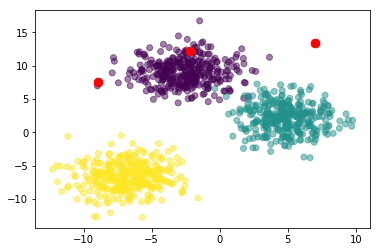

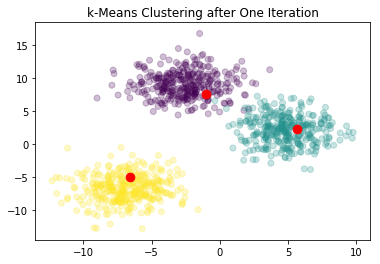

In [15]:
plt.scatter(centroids[:, 0], centroids[:, 1], 
            color='red', s=75, 
            zorder=2000, alpha=1)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

plt.scatter(np.array(new_clusters)[: , 0], 
            np.array(new_clusters)[: , 1], 
            color='red', s=75, 
            zorder=500, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.25)
plt.title('k-Means Clustering after One Iteration')
plt.show()